In [15]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "../Pictures/city_data.csv"
ride_data_to_load = "../Pictures/ride_data.csv"

# Read the City and Ride Data
citydata = pd.read_csv(city_data_to_load)
cityclean =citydata.drop_duplicates()
ridedata = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combinedata = pd.merge(cityclean, ridedata, how ='outer', on = 'city')
# Display the data table for preview
combinedata = combinedata.sort_values('city')

In [16]:
combinedata.head()

,city,driver_count,type,date,fare,ride_id
1523,Amandaburgh,12,Urban,2018-01-11 02:22:07,29.24,7279902884763
1522,Amandaburgh,12,Urban,2018-02-10 20:42:46,36.17,6455620849753
1529,Amandaburgh,12,Urban,2018-03-13 12:52:31,13.88,6222134922674
1524,Amandaburgh,12,Urban,2018-01-21 04:12:54,9.26,5528427024492
1525,Amandaburgh,12,Urban,2018-04-19 16:30:12,6.27,4400632718421


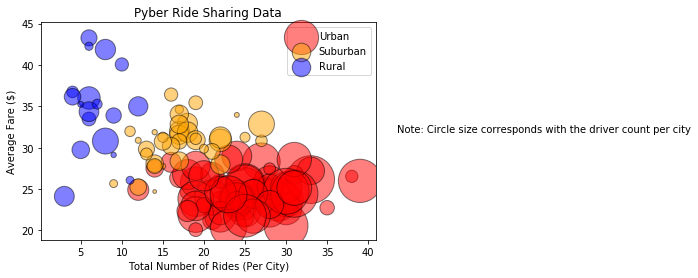

In [11]:
# Obtain the x and y coordinates for each of the three city types
urbandata = combinedata.loc[combinedata["type"] == "Urban", :]
suburbandata = combinedata.loc[combinedata["type"] == "Suburban", :]
ruraldata = combinedata.loc[combinedata["type"] == "Rural", :]

urbandatabycity = urbandata.groupby(['city'])
suburbandatabycity = suburbandata.groupby(['city'])
ruraldatabycity = ruraldata.groupby(['city'])

ridecount_urban = urbandata['city'].value_counts().sort_index()
ridecount_suburban = suburbandata['city'].value_counts().sort_index()
ridecount_rural = ruraldata['city'].value_counts().sort_index()

averageurbanfare = urbandatabycity['fare'].sum() / ridecount_urban
averagesuburbanfare = suburbandatabycity['fare'].sum() / ridecount_suburban
averageruralfare = ruraldatabycity['fare'].sum() / ridecount_rural

drivercounturban = urbandatabycity['driver_count'].sum()
drivercountsuburban = suburbandatabycity['driver_count'].sum()
drivercountrural = ruraldatabycity['driver_count'].sum()

 

# Build the scatter plots for each city types

urban = plt.scatter(ridecount_urban, averageurbanfare, marker="o", facecolors = "red", edgecolors = "black", s=drivercounturban, alpha=0.5)

suburban = plt.scatter(ridecount_suburban, averagesuburbanfare, marker="o", facecolors = "orange", edgecolors = "black", s=drivercountsuburban, alpha=0.5)

rural = plt.scatter(ridecount_rural, averageruralfare, marker="o", facecolors ="blue", edgecolors = "black", s=drivercountsuburban, alpha=0.5)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
# Create a legend
plt.legend((urban, suburban, rural), ('Urban', 'Suburban', 'Rural'), loc = "upper right")
# Incorporate a text label regarding circle size
plt.text(.95, 0.5, "Note: Circle size corresponds with the driver count per city", fontsize=10, transform=plt.gcf().transFigure)
# Save Figure
plt.savefig("../Pictures/PyberGraph.png")
plt.show()

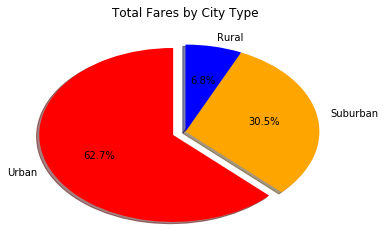

In [12]:
# Calculate Type Percents
urbanfare = urbandata['fare'].sum()
suburbanfare = suburbandata['fare'].sum()
ruralfare = ruraldata['fare'].sum()
# Build Pie Chart
labels = ["Urban", "Suburban", "Rural" ]

sizes = [urbanfare, suburbanfare, ruralfare]

colors = ["red", "orange", "blue"]

explode = (0.1,0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Total Fares by City Type")
# Save Figure
plt.savefig("../Pictures/TotalFareByType.png")
plt.show()


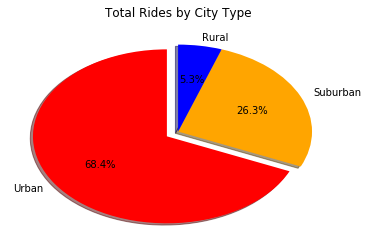

In [13]:
# Calculate Ride Percents
ridecount_urbanpercent = urbandata['city'].count()
ridecount_suburbanpercent = suburbandata['city'].count()
ridecount_ruralpercent = ruraldata['city'].count()
# Build Pie Chart
labels = ["Urban", "Suburban", "Rural" ]

sizes = [ridecount_urbanpercent, ridecount_suburbanpercent, ridecount_ruralpercent]

colors = ["red", "orange", "blue"]

explode = (0.1,0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Total Rides by City Type")

# Save Figure
plt.savefig("../Pictures/TotalRideByType.png")
plt.show()

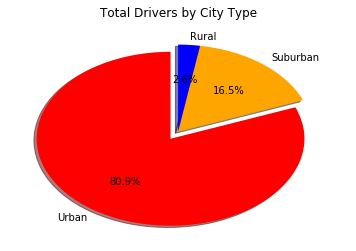

In [14]:
# Calculate Driver Percents
drivercounturban = (urbandatabycity['driver_count'].sum() / urbandatabycity['city'].count()).sum()
drivercountsuburban = (suburbandatabycity['driver_count'].sum() / suburbandatabycity['city'].count()).sum()
drivercountrural = (ruraldatabycity['driver_count'].sum() / ruraldatabycity['city'].count()).sum()
# Build Pie Charts
labels = ["Urban", "Suburban", "Rural" ]

sizes = [drivercounturban, drivercountsuburban, drivercountrural]

colors = ["red", "orange", "blue"]

explode = (0.1,0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Total Drivers by City Type")
# Save Figure
plt.savefig("../Pictures/TotalDriveByType.png")
plt.show()